In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datapath = "data/train data logrev/"
file_Xtrain = "X_train.csv"
file_ytrain = "y_train.csv"
file_Xtest  = "X_test.csv"
file_ytest  = "y_test.csv"

In [3]:
dfx0 = pd.read_csv(datapath+file_Xtrain)
dfx0.shape

/Users/Harper/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(563482, 95)

In [67]:
dfx0.describe()

,avg_hits,avg_pageviews,bounces,newVisits,fake_traffic,ctadwords,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,...,visit_hour_15,visit_hour_16,visit_hour_17,visit_hour_18,visit_hour_19,visit_hour_20,visit_hour_21,visit_hour_22,visit_hour_23,visitNumber
count,563482.000000,563482.000000,563482.000000,563482.000000,563482.0,563482.000000,563482.000000,563482.000000,563482.000000,563482.000000,...,563482.000000,563482.000000,563482.000000,563482.000000,563482.000000,563482.000000,563482.000000,563482.000000,563482.000000,563482.000000
mean,3.932035,3.350467,0.626444,0.983872,0.0,0.030031,0.023097,0.202315,0.008978,0.541194,...,0.065306,0.059585,0.053123,0.049006,0.046025,0.045052,0.044218,0.043169,0.040963,1.256454
std,7.256272,5.320012,0.932155,0.140602,0.0,0.174884,0.210485,0.782098,0.210102,1.016443,...,0.275453,0.260672,0.247346,0.241879,0.226948,0.221887,0.218916,0.214463,0.209174,1.407070
min,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.333333,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,3.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,500.000000,431.000000,186.000000,3.000000,0.0,7.000000,38.000000,155.000000,96.000000,253.000000,...,26.000000,16.000000,20.000000,53.000000,12.000000,11.000000,13.000000,13.000000,9.000000,278.000000


In [4]:
dfx0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563482 entries, 0 to 563481
Data columns (total 95 columns):
fullVisitorId                      563482 non-null object
avg_hits                           563482 non-null float64
avg_pageviews                      563482 non-null float64
bounces                            563482 non-null float64
newVisits                          563482 non-null float64
fake_traffic                       563482 non-null int64
ctadwords                          563482 non-null int64
channelGrouping_Affiliates         563482 non-null float64
channelGrouping_Direct             563482 non-null float64
channelGrouping_Display            563482 non-null float64
channelGrouping_Organic Search     563482 non-null float64
channelGrouping_Paid Search        563482 non-null float64
channelGrouping_Referral           563482 non-null float64
channelGrouping_Social             563482 non-null float64
isTrueDirect_FALSE                 563482 non-null float64
deviceCat

In [5]:
dfy0 = pd.read_csv(datapath+file_ytrain, names=["fullVisitorId", "transactionRevenue"])
dfy0.shape

/Users/Harper/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(563482, 2)

In [6]:
dfy0.columns

Index(['fullVisitorId', 'transactionRevenue'], dtype='object')

### Preprocess for Test dataset

In [7]:
dftx = pd.read_csv(datapath+file_Xtest)
dftx.shape

/Users/Harper/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(140871, 95)

In [8]:
dfty = pd.read_csv(datapath+file_ytest, names=["fullVisitorId", "transactionRevenue"])
dfty.shape

(140871, 2)

## 1) Target Value Transformation

In [9]:
dfy0.describe()

,transactionRevenue
count,563482.000000
mean,0.288761
std,2.919502
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,582.402405


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28577048>]],
      dtype=object)

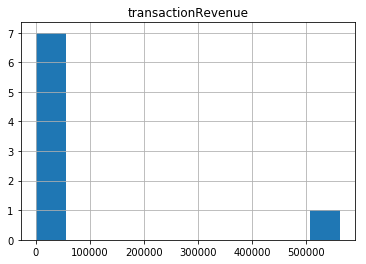

In [10]:
dfy0.describe().hist()

In [11]:
dfy0["transactionRevenue"].value_counts().count()

4175

### Preprocess for Test dataset

In [12]:
# N/A

## 2) Predictors Value Standardization

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
def standardize_feature(series):
    '''
    Use StandardScaler to standardizing a single feature
    ----------
    Parameters
    series: A Series
    ----------
    Returns
    scaled_array: A standardized numpy.array
    '''
    arr = np.reshape(series.tolist(), (-1,1))
    stscaler = StandardScaler().fit(arr)
    scaled_array = stscaler.transform(arr)
    return scaled_array

In [15]:
def standardize_dataframe(df):
    '''
    Use StandardScaler to standardizing a dataframe
    ----------
    Parameters
    series: A dataframe
    ----------
    Returns
    scaled_array: A standardized numpy.array
    '''
    stscaler = StandardScaler().fit(df)
    scaled_array = stscaler.transform(df)
    return scaled_array

In [16]:
dfx0_ = dfx0.drop("fullVisitorId", axis=1)

In [17]:
arr_x0 = standardize_dataframe(dfx0_)
arr_x0.shape

(563482, 94)

In [18]:
dfx2 = pd.DataFrame(arr_x0, columns=dfx0_.columns)
dfx2.insert(loc=0, column="fullVisitorId", value=dfx0["fullVisitorId"])

In [19]:
dfx2.head()

,fullVisitorId,avg_hits,avg_pageviews,bounces,newVisits,fake_traffic,ctadwords,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,...,visit_hour_15,visit_hour_16,visit_hour_17,visit_hour_18,visit_hour_19,visit_hour_20,visit_hour_21,visit_hour_22,visit_hour_23,visitNumber
0,9199694249115427127,-0.404069,-0.441817,0.400745,0.114709,0.0,-0.17172,-0.109735,-0.258683,-0.042732,...,-0.237088,-0.228582,-0.214773,-0.202606,-0.202798,-0.203041,-0.201986,-0.20129,-0.195833,-0.182261
1,2226471173658525097,-0.266257,-0.253847,-0.672040,0.114709,0.0,-0.17172,-0.109735,-0.258683,-0.042732,...,-0.237088,-0.228582,-0.214773,-0.202606,-0.202798,-0.203041,-0.201986,-0.20129,-0.195833,-0.182261
2,5690615457906521996,-0.404069,-0.441817,0.400745,0.114709,0.0,-0.17172,-0.109735,-0.258683,-0.042732,...,-0.237088,-0.228582,-0.214773,-0.202606,-0.202798,-0.203041,-0.201986,-0.20129,-0.195833,-0.182261
3,5231780110074309081,-0.404069,-0.441817,0.400745,0.114709,0.0,-0.17172,4.641206,-0.258683,-0.042732,...,-0.237088,-0.228582,-0.214773,-0.202606,-0.202798,-0.203041,-0.201986,-0.20129,-0.195833,-0.182261
4,3635150676929887362,-0.404069,-0.441817,0.400745,0.114709,0.0,-0.17172,-0.109735,-0.258683,-0.042732,...,-0.237088,-0.228582,-0.214773,-0.202606,-0.202798,-0.203041,-0.201986,-0.20129,-0.195833,-0.182261


### Preprocess for Test dataset

In [20]:
dftx_ = dftx.drop("fullVisitorId", axis=1)
arr_tx = standardize_dataframe(dftx_)
dftx2 = pd.DataFrame(arr_tx, columns=dftx_.columns)
dftx2.insert(loc=0, column="fullVisitorId", value=dftx["fullVisitorId"])
dftx2.shape

(140871, 95)

## 3) Train & Test Split

In [21]:
X_train = dfx2.drop("fullVisitorId", axis=1)
y_train = dfy0.drop("fullVisitorId", axis=1)

### Preprocess for Test dataset

In [22]:
X_test = dftx2.drop("fullVisitorId", axis=1)
y_test = dfty.drop("fullVisitorId", axis=1)

## 4) Feature Selection

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

/Users/Harper/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [24]:
# Run Random Forest to select features

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

/Users/Harper/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [25]:
# Evaluation with MSE and R2 scores

y_pred_train = rf.predict(X_train)
y_pred_test  = rf.predict(X_test)

rmse_train = mean_squared_error(y_train, y_pred_train)**(1/2)
rmse_test  = mean_squared_error(y_test,  y_pred_test)**(1/2)
print('Train set RMSE    : {:.2f}'.format(rmse_train))
print('Test  set RMSE    : {:.2f}'.format(rmse_test))

r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test,  y_pred_test)
print('Train set R2 score: {:.2f}'.format(r2_train))
print('Test  set R2 score: {:.2f}'.format(r2_test))

Train set RMSE    : 0.90
Test  set RMSE    : 2.21
Train set R2 score: 0.90
Test  set R2 score: 0.41


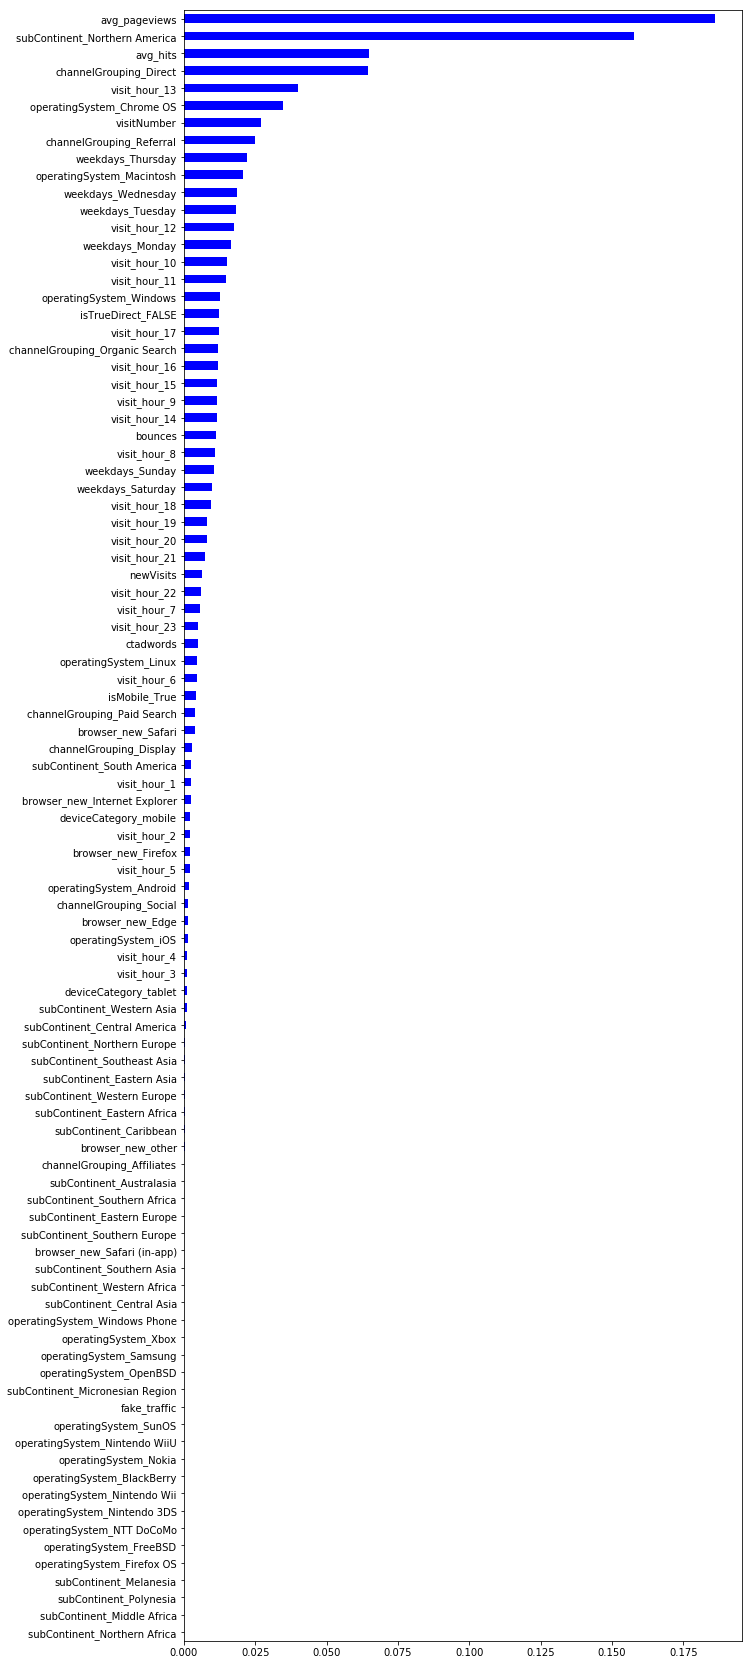

In [26]:
# Plot feature importances

importances_rf = pd.Series(rf.feature_importances_, index = X_train.columns)
sorted_importances_rf = importances_rf.sort_values()
plt.figure(figsize=(10, 30))
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

In [27]:
# 60 first features by their importance

features_selected = sorted_importances_rf.index[-60:].tolist()
features_selected.reverse()
features_selected[:5]

['avg_pageviews',
 'subContinent_Northern America',
 'avg_hits',
 'channelGrouping_Direct',
 'visit_hour_13']

## 5) Data Split for Two-step Modeling

In [28]:
# Select Features 

dfx5 = X_train[features_selected]
dfx5.shape

(563482, 60)

In [29]:
# Create a Switch to indicate Transaction or Non-transaction

dfy5 = y_train.copy()
dfy5["trans_switch"] = (dfy5["transactionRevenue"]>0)*1
dfx5["trans_switch"] = dfy5["trans_switch"]

/Users/Harper/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


#### 5.1) Data for Step-1: Classification for Transaction or Non-transaction

In [30]:
# X_train_s1
# Row    : All Observations
# Column : All Features

X_train_s1 = dfx5.drop("trans_switch", axis=1)
print(X_train_s1.shape)

(563482, 60)


In [31]:
# y_train_s1
# Row    : All Observations
# Column : Categorical Response

y_train_s1 = dfy5["trans_switch"]
print(y_train_s1.shape)

(563482,)


#### 5.2) Data for Step-2: Regression for Transaction Revenue

In [32]:
# X_train_s2
# Row    : Observations with Transactions
# Column : All Features

X_train_s2 = dfx5.loc[dfx5["trans_switch"]==1, :]
X_train_s2 = X_train_s2.drop("trans_switch", axis=1)
print(X_train_s2.shape)

(7928, 60)


In [33]:
# y_train_s2
# Row    : Observations with Transactions
# Column : Transaction Revenue

y_train_s2 = dfy5.loc[dfy5["trans_switch"]==1, :]
y_train_s2 = y_train_s2.drop("trans_switch", axis=1)
print(y_train_s2.shape)
y_train_s2.describe()

(7928, 1)


,transactionRevenue
count,7928.000000
mean,20.523694
std,13.803405
min,10.596635
25%,17.020591
50%,17.727334
75%,18.617562
max,582.402405


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b46e4a7b8>]],
      dtype=object)

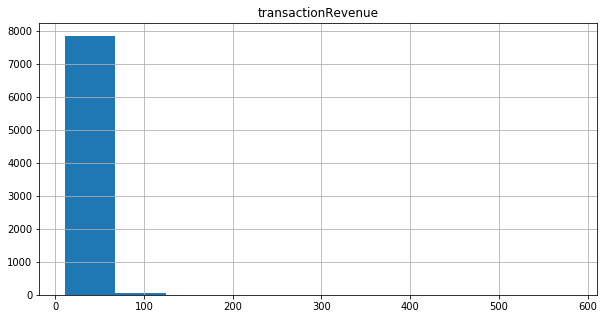

In [54]:
y_train_s2.hist()

### Preprocess for Test Dataset

In [34]:
dftx5 = X_test[features_selected]
dfty5 = y_test.copy()
dfty5["trans_switch"] = (dfty5["transactionRevenue"]>0)*1
dftx5["trans_switch"] = dfty5["trans_switch"]

X_test_s1 = dftx5.drop("trans_switch", axis=1)
print(X_test_s1.shape)

y_test_s1 = dfty5["trans_switch"]
print(y_test_s1.shape)

X_test_s2 = dftx5.loc[dftx5["trans_switch"]==1, :]
X_test_s2 = X_test_s2.drop("trans_switch", axis=1)
print(X_test_s2.shape)

y_test_s2 = dfty5.loc[dfty5["trans_switch"]==1, :]
y_test_s2 = y_test_s2.drop("trans_switch", axis=1)
print(y_test_s2.shape)
y_test_s2.describe()

(140871, 60)
(140871,)
(2067, 60)
(2067, 1)


/Users/Harper/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,transactionRevenue
count,2067.000000
mean,20.564371
std,12.392800
min,9.210340
25%,17.030378
50%,17.777656
75%,18.755366
max,285.144613


## 6) Feature Extraction: PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
def fit_pca(df, n_components):
    '''
    Uses sklearn.decomposition.PCA to fit a PCA model on "df".
    ----------
    Parameters
    df: A pandas.DataFrame
    n_components: An int. Number of principal components to keep
    ----------
    Returns
    An sklearn.decomposition.pca.PCA instance.
    '''
    pca = PCA(n_components=n_components)
    pca_fitted = pca.fit(df)
    return pca_fitted

In [37]:
def plot_pca_variance(pca):
    '''
    Plots the variance explained by each of the principal components.
    Attributes are not scaled, hence a naive approach.
    ----------
    Parameters
    pca: An sklearn.decomposition.pca.PCA instance.
    ----------
    Returns
    A matplotlib.Axes instance.
    '''
    features = range(pca.n_components_)
    ax = plt.axes()
    plt.rcParams["figure.figsize"] = (10,5)
    plt.plot(features, pca.explained_variance_ratio_)
    plt.xlabel('Dimension #')
    plt.ylabel('Explained Variance Ratio')
    plt.title("Fraction of Explained Variance")
    plt.xticks(features)
    plt.show()
    return ax

In [38]:
def pca_trans(pca, array):
    '''
    Applies the `pca` model on array.
    ----------
    Parameters
    pca: An sklearn.decomposition.PCA instance.
    ----------
    Returns
    A Numpy array
    '''
    reduced = pca.transform(array)
    return reduced

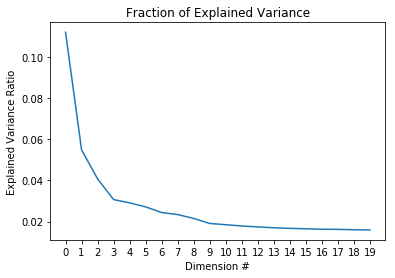

In [39]:
# Model-S1: Try 20 PCA

pca_model = fit_pca(X_train_s1, 20)
plot_pca_variance(pca_model)

In [40]:
# Model-S1: Select 12 PCA to transform

pca_model = fit_pca(X_train_s1, 12)
X_train_s1_pca = pca_trans(pca_model, X_train_s1)
print(X_train_s1_pca.shape)

(563482, 12)


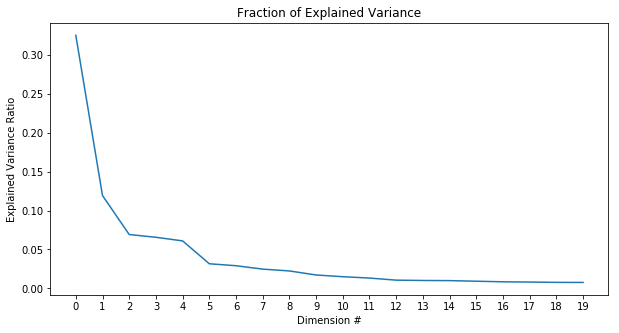

In [41]:
# Model-S2: Try 20 PCA

pca_model = fit_pca(X_train_s2, 20)
plot_pca_variance(pca_model)

In [42]:
# Model-S2: Select 10 PCA to transform

pca_model = fit_pca(X_train_s2, 10)
X_train_s2_pca = pca_trans(pca_model, X_train_s2)
print(X_train_s2_pca.shape)

(7928, 10)


### Preprocess for Test dataset

In [43]:
# Model-S1: Select 12 PCA to transform
pca_model = fit_pca(X_test_s1, 12)
X_test_s1_pca = pca_trans(pca_model, X_test_s1)
print(X_test_s1_pca.shape)

# Model-S2: Select 10 PCA to transform
pca_model = fit_pca(X_test_s2, 10)
X_test_s2_pca = pca_trans(pca_model, X_test_s2)
print(X_test_s2_pca.shape)

(140871, 12)
(2067, 10)


## 7) Modeling step-1: Classification for Transaction or Non-transaction

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeClassifier
from sklearn.svm          import SVC
from sklearn.ensemble     import RandomForestRegressor
from sklearn.metrics      import mean_squared_error, r2_score
from sklearn.metrics      import accuracy_score, classification_report
#from sklearn.metrics      import accuracy_score, classification_report, f1_score, precision_score, recall_score
import pickle

In [45]:
# 7.1) Run Logistic Regression

s1_lr = LogisticRegression()
s1_lr.fit(X_train_s1_pca, y_train_s1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
# Save and load the fitted model
modelfile = 's1_lr.sav'
pickle.dump(s1_lr, open(modelfile, 'wb'))
#s1_lr = pickle.load(open(modelfile, 'rb'))

In [94]:
# model evaluation
labels = [0, 1]

y_pred_train_s1 = s1_lr.predict(X_train_s1_pca)
accuracy = accuracy_score(y_train_s1, y_pred_train_s1)
classrpt = classification_report(y_train_s1, y_pred_train_s1, labels=labels)
print(f"Train Accuracy   : {accuracy}")
print(classrpt)
print("==============================")

y_pred_test_s1 = s1_lr.predict(X_test_s1_pca)
accuracy = accuracy_score(y_test_s1, y_pred_test_s1)
classrpt = classification_report(y_test_s1, y_pred_test_s1, labels=labels)
print(f"Test  Accuracy   : {accuracy}")
print(classrpt)

Train Accuracy   : 0.9856712370581492
             precision    recall  f1-score   support

          0       0.99      1.00      0.99    555554
          1       0.47      0.17      0.26      7928

avg / total       0.98      0.99      0.98    563482

Test  Accuracy   : 0.9846384280653931
             precision    recall  f1-score   support

          0       0.99      1.00      0.99    138804
          1       0.45      0.23      0.31      2067

avg / total       0.98      0.98      0.98    140871



In [48]:
# 7.2) Run Decision Tree

s1_dt = DecisionTreeClassifier(random_state=42)
s1_dt.fit(X_train_s1_pca, y_train_s1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [49]:
# Save and load the fitted model
modelfile = 's1_dt.sav'
pickle.dump(s1_dt, open(modelfile, 'wb'))
#s1_dt = pickle.load(open(modelfile, 'rb'))

In [95]:
# model evaluation
labels = [0, 1]

y_pred_train_s1 = s1_dt.predict(X_train_s1_pca)
accuracy = accuracy_score(y_train_s1, y_pred_train_s1)
classrpt = classification_report(y_train_s1, y_pred_train_s1, labels=labels)
print(f"Train Accuracy   : {accuracy}")
print(classrpt)
print("==============================")

y_pred_test_s1 = s1_dt.predict(X_test_s1_pca)
accuracy = accuracy_score(y_test_s1, y_pred_test_s1)
classrpt = classification_report(y_test_s1, y_pred_test_s1, labels=labels)
print(f"Test  Accuracy   : {accuracy}")
print(classrpt)

Train Accuracy   : 0.9998615749926351
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    555554
          1       1.00      0.99      1.00      7928

avg / total       1.00      1.00      1.00    563482

Test  Accuracy   : 0.975587594323885
             precision    recall  f1-score   support

          0       0.99      0.98      0.99    138804
          1       0.26      0.35      0.30      2067

avg / total       0.98      0.98      0.98    140871



In [51]:
# 7.3) Run Random Forest

s1_rf = RandomForestRegressor(n_estimators=1000, random_state=42)
s1_rf.fit(X_train_s1_pca, y_train_s1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [52]:
# Save and load the fitted model
modelfile = 's1_rf.sav'
pickle.dump(s1_rf, open(modelfile, 'wb'))
#s1_rf = pickle.load(open(modelfile, 'rb'))

In [93]:
# model evaluation
labels = [0, 1]

y_pred_train_s1_prob = s1_rf.predict(X_train_s1_pca)
y_pred_train_s1 = (y_pred_train_s1_prob >= 0.5)*1
accuracy = accuracy_score(y_train_s1, y_pred_train_s1)
classrpt = classification_report(y_train_s1, y_pred_train_s1, labels=labels)
print(f"Train Accuracy   : {accuracy}")
print(classrpt)
print("==============================")

y_pred_test_s1_prob = s1_rf.predict(X_test_s1_pca)
y_pred_test_s1 = (y_pred_test_s1_prob >= 0.5)*1
accuracy = accuracy_score(y_test_s1, y_pred_test_s1)
classrpt = classification_report(y_test_s1, y_pred_test_s1, labels=labels)
print(f"Test  Accuracy   : {accuracy}")
print(classrpt)

Train Accuracy   : 0.9998615749926351
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    555554
          1       1.00      0.99      1.00      7928

avg / total       1.00      1.00      1.00    563482

Test  Accuracy   : 0.9856961333418518
             precision    recall  f1-score   support

          0       0.99      1.00      0.99    138804
          1       0.53      0.22      0.31      2067

avg / total       0.98      0.99      0.98    140871



In [ ]:
# 7.4) Run SVM

# s1_svc  = SVC(kernel='rbf', gamma=0.25).fit(X_train_s1_pca, y_train_s1)
# type(s1_svc)

In [ ]:
# Save and load the fitted model
# modelfile = 's1_svc.sav'
# pickle.dump(s1_svc, open(modelfile, 'wb'))
# #s1_svc = pickle.load(open(modelfile, 'rb'))

In [ ]:
# model evaluation
# labels = [0, 1]

# y_pred_train_s1 = s1_svc.predict(X_train_s1_pca)
# accuracy = accuracy_score(y_train_s1, y_pred_train_s1)
# classrpt = classification_report(y_train_s1, y_pred_train_s1, labels=labels)
# print(f"Train Accuracy   : {accuracy}")
# print(classrpt)
# print("==============================")

# y_pred_test_s1 = s1_svc.predict(X_test_s1_pca)
# accuracy = accuracy_score(y_test_s1, y_pred_test_s1)
# classrpt = classification_report(y_test_s1, y_pred_test_s1, labels=labels)
# print(f"Test  Accuracy   : {accuracy}")
# print(classrpt)

## 8) Modeling step-2: Regression for Transaction Revenue

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble     import RandomForestRegressor
from sklearn.metrics      import mean_squared_error, r2_score
import pickle

### 8.1) Linear Regression

In [101]:

s2_lr = LinearRegression()
s2_lr.fit(X_train_s2_pca, y_train_s2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
# Save and load the fitted model
modelfile = 's2_lr.sav'
pickle.dump(s2_lr, open(modelfile, 'wb'))
#s2_lr = pickle.load(open(modelfile, 'rb'))

In [131]:
# Model evaluation
y_pred_train_s2 = s2_lr.predict(X_train_s2_pca)
y_pred_test_s2  = s2_lr.predict(X_test_s2_pca)

rmse_train_s2 = mean_squared_error(y_train_s2, y_pred_train_s2)**(1/2)
rmse_test_s2  = mean_squared_error(y_test_s2,  y_pred_test_s2)**(1/2)
print('Train set RMSE     : {:.2f}'.format(rmse_train_s2))
print('Test  set RMSE     : {:.2f}'.format(rmse_test_s2))

r2_train_s2 = r2_score(y_train_s2, y_pred_train_s2)
r2_test_s2  = r2_score(y_test_s2,  y_pred_test_s2)
print('Train set R2 score : {:.2f}'.format(r2_train_s2))
print('Test  set R2 score : {:.2f}'.format(r2_test_s2))

Train set RMSE     : 11.81
Test  set RMSE     : 11.99
Train set R2 score : 0.27
Test  set R2 score : 0.06


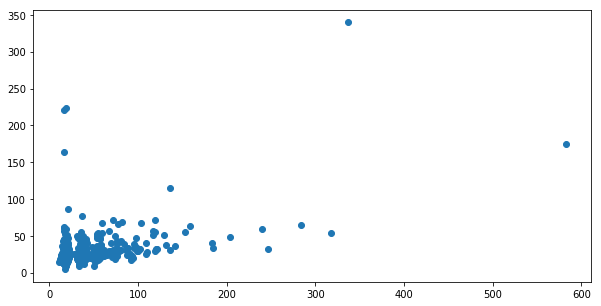

In [132]:
plt.scatter(y_train_s2, y_pred_train_s2)

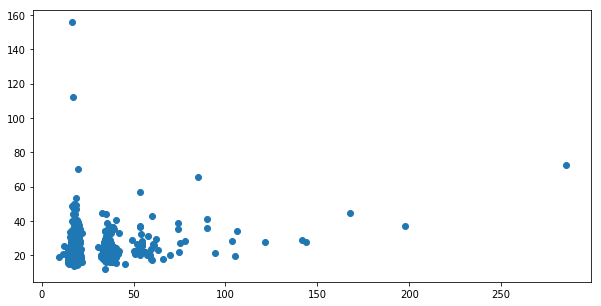

In [130]:
plt.scatter(y_test_s2, y_pred_test_s2)

### 8.2) Random Forest

In [108]:

s2_rf = RandomForestRegressor(n_estimators=1000, random_state=42)
s2_rf.fit(X_train_s2_pca, y_train_s2)

/Users/Harper/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [109]:
# Save and load the fitted model
modelfile = 's2_rf.sav'
pickle.dump(s2_rf, open(modelfile, 'wb'))
#s2_rf = pickle.load(open(modelfile, 'rb'))

In [133]:
# Model evaluation
y_pred_train_s2 = s2_rf.predict(X_train_s2_pca)
y_pred_test_s2  = s2_rf.predict(X_test_s2_pca)

rmse_train_s2 = mean_squared_error(y_train_s2, y_pred_train_s2)**(1/2)
rmse_test_s2  = mean_squared_error(y_test_s2,  y_pred_test_s2)**(1/2)
print('Train set RMSE     : {:.2f}'.format(rmse_train_s2))
print('Test  set RMSE     : {:.2f}'.format(rmse_test_s2))

r2_train_s2 = r2_score(y_train_s2, y_pred_train_s2)
r2_test_s2  = r2_score(y_test_s2,  y_pred_test_s2)
print('Train set R2 score : {:.2f}'.format(r2_train_s2))
print('Test  set R2 score : {:.2f}'.format(r2_test_s2))

Train set RMSE     : 4.50
Test  set RMSE     : 14.22
Train set R2 score : 0.89
Test  set R2 score : -0.32


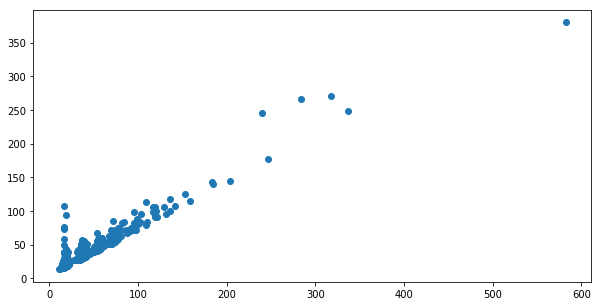

In [134]:
plt.scatter(y_train_s2, y_pred_train_s2)

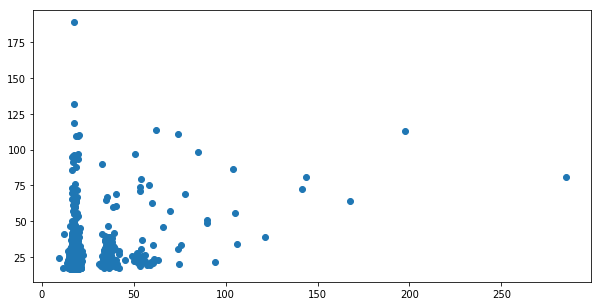

In [128]:
plt.scatter(y_test_s2, y_pred_test_s2)

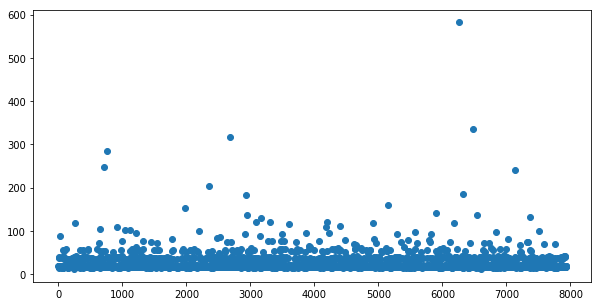

In [137]:
plt.scatter(range(len(y_train_s2)), y_train_s2)

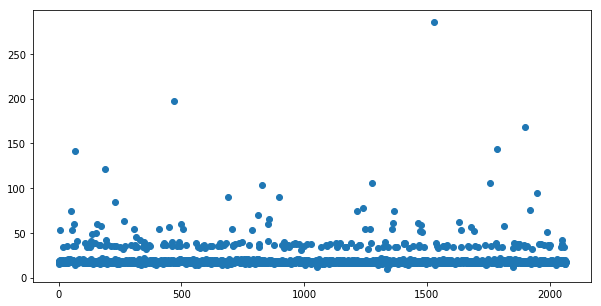

In [138]:
plt.scatter(range(len(y_test_s2)), y_test_s2)

## KMeans

In [139]:
from sklearn.cluster import KMeans

In [180]:
km = KMeans(n_clusters=3).fit(y_test_s2)
km_label = km.labels_
pd.Series(km_label).value_counts()

0    1863
2     195
1       9
dtype: int64

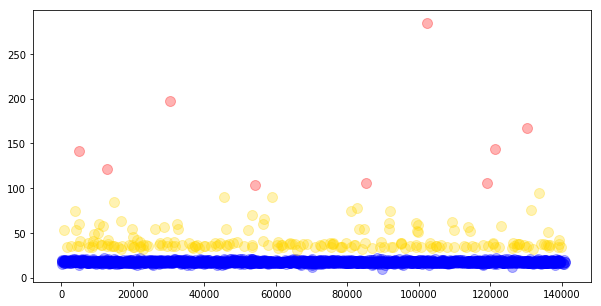

In [181]:
df_km = y_test_s2.copy()
df_km["label"] = km_label
colors = ["blue", "red", "gold"]

fig, ax = plt.subplots(figsize=(10, 5))

clusterid_km = np.unique(km_label).tolist()
for idx in range(len(clusterid_km)):
    tmp_df = df_km[df_km['label']==clusterid_km[idx]]
    ax.scatter(tmp_df.index, tmp_df['transactionRevenue'], 
               color=colors[idx], label=clusterid_km[idx], alpha=0.3, s=100)

## DBSCAN

In [147]:
from sklearn.cluster import DBSCAN

In [198]:
dbsc = DBSCAN(eps=3, min_samples=20).fit(y_test_s2)
dbsc_label = dbsc.labels_
pd.Series(dbsc_label).value_counts()

 0    1863
 1     153
-1      51
dtype: int64

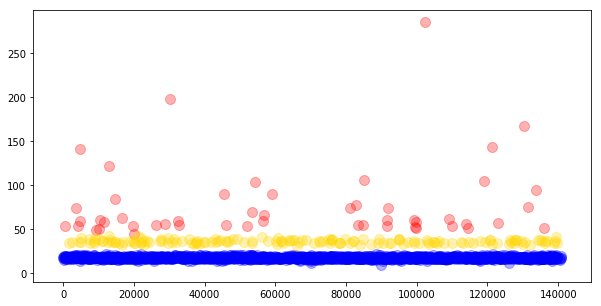

In [199]:
df_dbsc = y_test_s2.copy()
df_dbsc["label"] = dbsc_label
colors = ["red", "blue", "gold", "black"]

fig, ax = plt.subplots(figsize=(10, 5))

clusterid_dbsc = np.unique(dbsc_label).tolist()
for idx in range(len(clusterid_dbsc)):
    tmp_df = df_dbsc[df_dbsc['label']==clusterid_dbsc[idx]]
    ax.scatter(tmp_df.index, tmp_df['transactionRevenue'], 
               color=colors[idx], label=clusterid_dbsc[idx], alpha=0.3, s=100)

In [213]:
dbsc = DBSCAN(eps=0.5, min_samples=20).fit(y_train_s2)
dbsc_label = dbsc.labels_
pd.Series(dbsc_label).value_counts()

 0    7159
 1     533
-1     236
dtype: int64

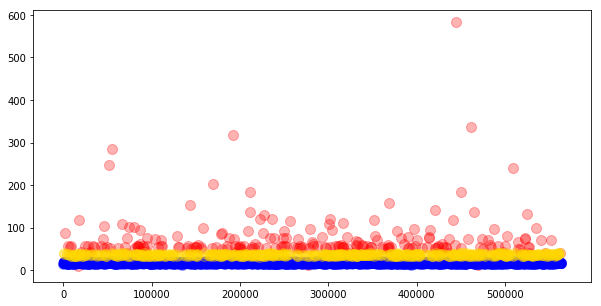

In [214]:
df_dbsc = y_train_s2.copy()
df_dbsc["label"] = dbsc_label
colors = ["red", "blue", "gold", "silver", "black"]

fig, ax = plt.subplots(figsize=(10, 5))

clusterid_dbsc = np.unique(dbsc_label).tolist()
for idx in range(len(clusterid_dbsc)):
    tmp_df = df_dbsc[df_dbsc['label']==clusterid_dbsc[idx]]
    ax.scatter(tmp_df.index, tmp_df['transactionRevenue'], 
               color=colors[idx], label=clusterid_dbsc[idx], alpha=0.3, s=100)